# "2019 January Portfolio BackTest"
> "2019 January portfolio"
- toc: false
- branch: master
- badges: false
- comments: true
- categories: [long, short, longshort]
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

In [108]:
#hide_input
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import gc
import glob
import matplotlib.pyplot as plt

In [109]:
#hide_input
df_testp=pd.read_csv('D:\\Downloads\\20194dayreturnpred2019train60K.csv')

In [110]:
#hide_input
df_testp=df_testp[['Company Name','Date', 'Ticker', 'label',  'pred', 'prof0.0', 'prof-1.0',
       'prof1.0', 'return1&2', 'return1&2&3', 'return1&2&3&4', 'return2',
       'return1', 'return3', 'return4', 'cumulative_return1',
       'cumulative_return1&2', 'cumulative_return1&2&3',
       'cumulative_return1&2&3&4']].copy()

In [111]:
#hide
import datetime
datetoday=f"{datetime.datetime.now():%Y%m%d}"
dateyesterday=int(datetoday)-6;dateyesterday

20200423

In [112]:
#hide
df_testp=df_testp.loc[df_testp.Date>=20190101].loc[df_testp.Date<=20190201].copy().reset_index()

**Long-Short Portfolio**

In [113]:
#hide
#df_testp=df_testp.loc[df_testp.Date>=20200201].copy().reset_index()
df_testp['indexx']=range(len(df_testp))

In [114]:
#hide
df_testp['cumulative_return1']=0.0
df_testp['cumulative_return1&2']=0.0
df_testp['cumulative_return1&2&3']=0.0
df_testp['cumulative_return1&2&3&4']=0.0
for l in range(len(df_testp)):
  df_testp['cumulative_return1'][l]=np.prod(df_testp['return1'][:l])
  df_testp['cumulative_return1&2'][l]=np.prod(df_testp['return1&2'][:l])
  df_testp['cumulative_return1&2&3'][l]=np.prod(df_testp['return1&2&3'][:l])
  df_testp['cumulative_return1&2&3&4'][l]=np.prod(df_testp['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [115]:
#hide_input
df_testp.head()

,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,return1&2,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,0,HURCO COMPANIES INC,20190104,HURC,-1.0,1.0,0.161854,0.347908,0.490238,0.972230,...,0.993388,1.010168,0.962444,1.025571,0.996286,1.000000,1.000000,1.000000,1.000000,0
1,1,XSUNX INC,20190107,XSNX,1.0,1.0,0.126500,0.400347,0.473153,1.166667,...,1.333333,1.000000,1.166667,1.000000,1.142857,0.962444,0.972230,0.997091,0.993388,1
2,2,FUELCELL ENERGY INC,20190110,FCEL,-1.0,1.0,0.120616,0.392821,0.486563,0.981818,...,0.981818,1.038462,0.945455,1.037037,0.964286,1.122851,1.134268,1.163273,1.324517,2
3,3,FIRST REAL ESTATE INVESTMENT TRUST OF NEW JERSEY,20190111,FREVS,0.0,1.0,0.133306,0.374441,0.492253,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.061605,1.113645,1.184423,1.300435,3
4,4,URSTADT BIDDLE PROPERTIES INC,20190111,UBA,1.0,1.0,0.100598,0.417170,0.482232,0.988692,...,1.009341,1.007515,0.981318,1.009448,1.011330,1.061605,1.113645,1.184423,1.300435,4


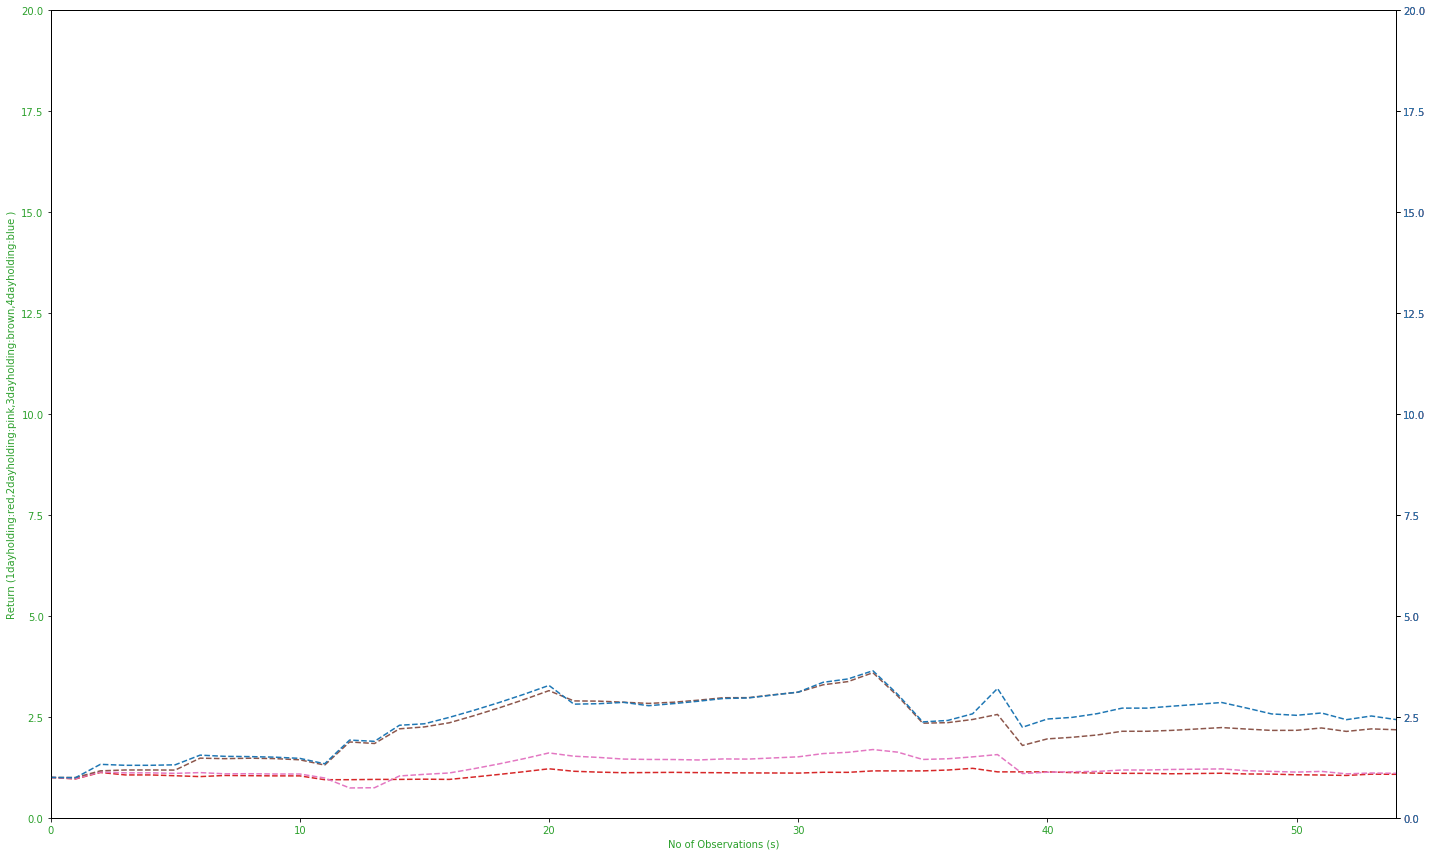

In [116]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_testp['indexx'], df_testp['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_testp['indexx'], df_testp['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_testp['indexx'], df_testp['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_testp['indexx'], df_testp['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,20
a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)

x,y =df_testp['indexx'].min(),df_testp['indexx'].max()
a1.set_xlim(x,y)
a2.set_xlim(x,y)
a3.set_xlim(x,y)
a4.set_xlim(x,y)


fig.tight_layout()

**Long portfolio**

In [117]:
#hide_input
df_long=df_testp.copy()
df_long=df_long.loc[df_long.pred==1.0].sort_values(by='prof1.0',ascending=False).reset_index()


In [118]:
#hide_input
df_long['indexx']=range(len(df_long))

In [119]:
#hide
df_long['cumulative_return1']=0.0
df_long['cumulative_return1&2']=0.0
df_long['cumulative_return1&2&3']=0.0
df_long['cumulative_return1&2&3&4']=0.0
for l in range(len(df_long)):
  df_long['cumulative_return1'][l]=np.prod(df_long['return1'][:l])
  df_long['cumulative_return1&2'][l]=np.prod(df_long['return1&2'][:l])
  df_long['cumulative_return1&2&3'][l]=np.prod(df_long['return1&2&3'][:l])
  df_long['cumulative_return1&2&3&4'][l]=np.prod(df_long['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [120]:
#hide_input
df_long.head()

,level_0,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,29,29,CARNIVAL CORP,20190128,CCL,1.0,1.0,0.125704,0.250364,0.623932,...,1.023227,1.020796,0.997518,1.002612,1.002258,1.000000,1.000000,1.000000,1.000000,0
1,31,31,CARNIVAL PLC,20190128,CUK,1.0,1.0,0.125704,0.250364,0.623932,...,1.024847,1.021277,0.998560,1.004237,1.000703,0.997518,1.018262,1.020922,1.023227,1
2,28,28,CARNIVAL PLC,20190128,CUK,1.0,1.0,0.125704,0.250364,0.623932,...,1.024847,1.021277,0.998560,1.004237,1.000703,0.996081,1.038430,1.045554,1.048651,2
3,26,26,CARNIVAL CORP,20190128,CCL,1.0,1.0,0.125704,0.250364,0.623932,...,1.023227,1.020796,0.997518,1.002612,1.002258,0.994646,1.058996,1.070779,1.074707,3
4,48,48,MDC HOLDINGS INC,20190131,MDC,-1.0,1.0,0.096032,0.332824,0.571144,...,0.946553,0.988121,0.996963,0.999692,0.961147,0.992177,1.078336,1.093182,1.099669,4


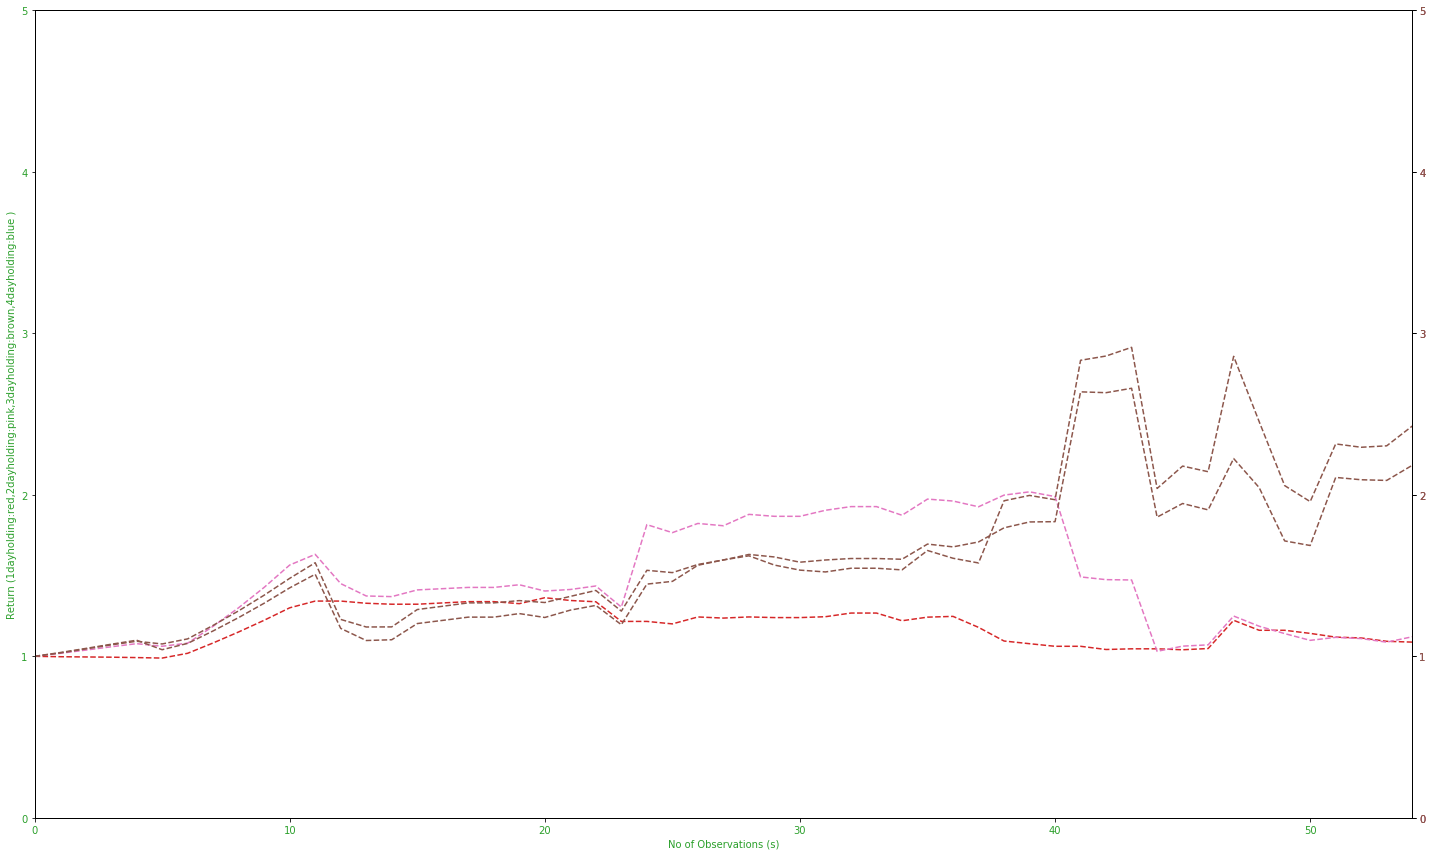

In [121]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_long['indexx'], df_long['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_long['indexx'], df_long['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_long['indexx'], df_long['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_long['indexx'], df_long['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,5

a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)

x,y =df_long['indexx'].min(),df_testp['indexx'].max()
a1.set_xlim(x,y)
a2.set_xlim(x,y)
a3.set_xlim(x,y)
a4.set_xlim(x,y)

fig.tight_layout()

**Short Portfolio**

In [122]:
#hide_input
df_short=df_testp.copy()
df_short=df_short.loc[df_short.pred==-1.0].sort_values(by='prof-1.0',ascending=False).reset_index()

In [123]:
#hide_input
df_short['indexx']=range(len(df_short))

In [124]:
#hide
df_short['cumulative_return1']=0.0
df_short['cumulative_return1&2']=0.0
df_short['cumulative_return1&2&3']=0.0
df_short['cumulative_return1&2&3&4']=0.0
for l in range(len(df_short)):
  df_short['cumulative_return1'][l]=np.prod(df_short['return1'][:l])
  df_short['cumulative_return1&2'][l]=np.prod(df_short['return1&2'][:l])
  df_short['cumulative_return1&2&3'][l]=np.prod(df_short['return1&2&3'][:l])
  df_short['cumulative_return1&2&3&4'][l]=np.prod(df_short['return1&2&3&4'][:l])

In [125]:
#hide_input
df_short.head()

,level_0,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx


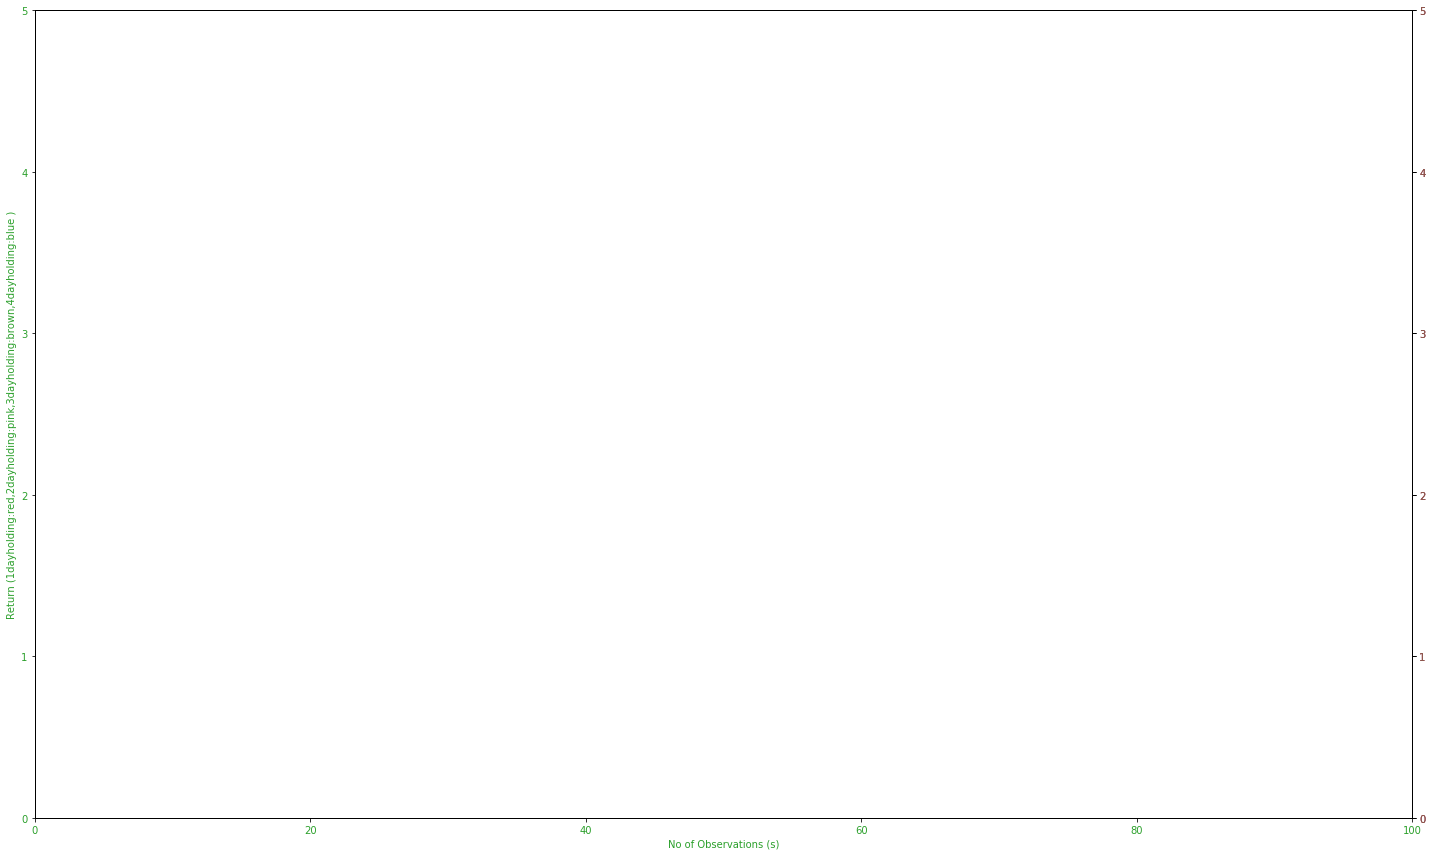

In [127]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_short['indexx'], df_short['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_short['indexx'], df_short['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_short['indexx'], df_short['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_short['indexx'], df_short['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,5
a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)

#x,y =df_short['indexx'].min(),df_short['indexx'].max()
x,y=0,100
a1.set_xlim(x,y)
a2.set_xlim(x,y)
a3.set_xlim(x,y)
a4.set_xlim(x,y)

fig.tight_layout()